# Machine Learning Model Implementation

1. Data Loading
2. Label Encoding
3. TF-IDF Vectorization for Features
4. Data Splitting
5. Model Implementation


| Models | Accuracy | F1 Score |
| --- | --- | --- |
| SVM | 0.8239 | 0.8144 |
| SVM Tuned |  |  |
| Logistic Regression | 0.8101 | 0.7933 |
| Logistic Regression Tuned | 0.8378 | 0.8317 |
| Random Forest | | |
| Random Forest Tuned | | |
| Naive Bayes | | |
| Naive Bayes Tuned | | |
| XGBoost | | |
| XGBoost Tuned | | |

### Initial Setup

In [2]:
import os, joblib
import xgboost as xgb
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [3]:
# Define Data directory
DATA_DIR = '../data/'

# list of poet names
# Removed the 5 lowest poets
poets = ["abbasinYousuf", "hamzaBaba", "karanKhan", "khatirAfridi", "khushalKhanKhattak", "matiullahTurab", "mumtazOrakazi", "munirJan", "naeemAhmed", "rabiaMumtaz", "rahmanBaba", "rehmatShah", "sahibShahSabir"]

# # Pehle k 13
# poets = ["abbasinYousuf", "azizMazerwal", "ghaniKhan", "hamzaBaba", "khaliqZiari", "khatirAfridi", "khushalKhanKhattak",  "mumtazOrakazi", "munirJan",  "rahmanBaba", "rehmatShah", "sahibShahSabir", "salimRiaz"]

## All
# poets = ["abbasinYousuf", "azizMazerwal", "ghaniKhan", "hamzaBaba", "karanKhan", "khaliqZiari", "khatirAfridi", "khushalKhanKhattak", "matiullahTurab", "mumtazOrakazi", "munirJan", "naeemAhmed", "rabiaMumtaz", "rahmanBaba", "rehmatShah", "sahibShahSabir", "salimRiaz"]

poet_labels = {poet: i for i, poet in enumerate(poets)}
print(poet_labels)

{'abbasinYousuf': 0, 'hamzaBaba': 1, 'karanKhan': 2, 'khatirAfridi': 3, 'khushalKhanKhattak': 4, 'matiullahTurab': 5, 'mumtazOrakazi': 6, 'munirJan': 7, 'naeemAhmed': 8, 'rabiaMumtaz': 9, 'rahmanBaba': 10, 'rehmatShah': 11, 'sahibShahSabir': 12}


In [4]:
# Load and Label the Data
def load_and_label(data_dir, poets, poet_labels):
    data = []
    labels = []

    for poet in poets:
        poet_dir = os.path.join(data_dir, poet)
        file_path = os.path.join(poet_dir, f'{poet}.txt')

        # Check if the file exists
        if not os.path.exists(file_path):
            print(f'{file_path} does not exist')
            continue

        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
            data.extend(lines)
            labels.extend([poet_labels[poet]] * len(lines))

    df = pd.DataFrame({'text': data, 'label': labels})
    return data, labels, df

In [5]:
data, labels, df = load_and_label(DATA_DIR, poets, poet_labels)
df.describe()

,label
count,36629.000000
mean,5.326217
std,3.542465
min,0.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,12.000000


In [6]:
def extract_features(df, num_features=None):
    tfidf_vectorizer = TfidfVectorizer(max_features=num_features)
    # tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X = tfidf_vectorizer.fit_transform(df['text']).toarray()
    y = df['label'].values
    return X, y, tfidf_vectorizer

In [7]:
# X, y, tfidf_vectorizer = extract_features(df)
X, y, tfidf_vectorizer = extract_features(df, 15000)
# X, y, tfidf_vectorizer = extract_features(df, 5000)

In [8]:
print(f"Number of samples: {len(df)}")
print(f"Number of features (TF-IDF): {X.shape[1]}")
print(f"Class distribution:\n{df['label'].value_counts()}")

Number of samples: 36629
Number of features (TF-IDF): 15000
Class distribution:
label
4     8514
10    4405
0     3750
6     3291
3     2873
1     2355
7     2339
12    2103
2     1958
8     1712
5     1214
9     1144
11     971
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29303, 15000), (7326, 15000), (29303,), (7326,))

### Support Vector Machine (SVM) Model with TF-IDF Vectorization, UnBalanced Data

In [9]:
# SVM Model
svm = SVC(kernel='linear', random_state=42)

# Training and predictions
print(f"Training the SVM model...")
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print(f"Training and Predicting Done!")

Training the SVM model...
Training and Predicting Done!



Model Performance and Evaluation
Accuracy: 0.7614
F1 Score (Weighted): 0.7534
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.19      0.31        47
           1       1.00      0.25      0.40        12
           2       0.83      0.41      0.55       111
           3       0.60      0.66      0.63       471
           4       0.00      0.00      0.00        16
           5       0.65      0.60      0.62       575
           6       0.86      0.94      0.90      1703
           7       0.73      0.80      0.76       658
           8       0.64      0.65      0.64       468
           9       0.86      0.84      0.85       881
          10       0.73      0.58      0.65       194
          11       0.65      0.66      0.66       421
          12       0.74      0.25      0.37        93

    accuracy                           0.76      5650
   macro avg       0.70      0.52      0.56      5650
weighted avg       0.76      0.7

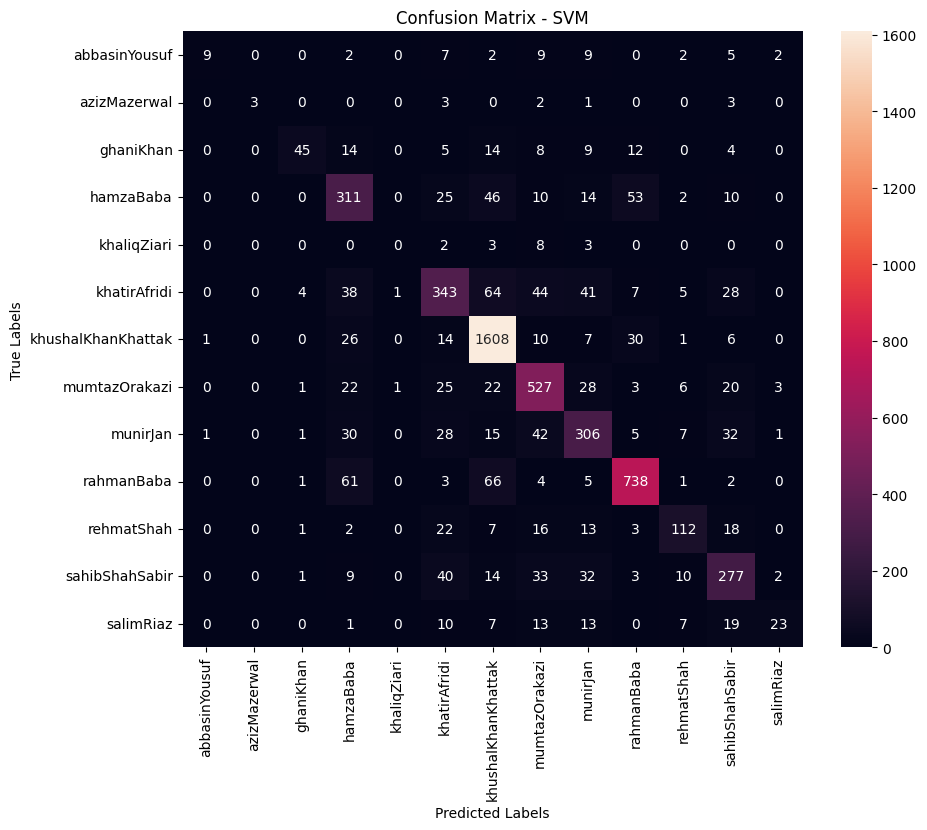

In [10]:
# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score (Weighted): {f1_svm:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

### Logistic Regression Model with TF-IDF Vectorization, Unbalanced Data

In [9]:
log_reg = LogisticRegression(max_iter=1000)

print(f"Training the Logistic Regression model...")
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
print(f"Training and Predicting Done!")

Training the Logistic Regression model...
Training and Predicting Done!



Model Performance and Evaluation
Accuracy: 0.8101
F1 Score (Weighted): 0.7933
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        47
           1       0.00      0.00      0.00        12
           2       0.76      0.25      0.38       112
           3       0.75      0.59      0.66       515
           4       0.00      0.00      0.00        16
           5       0.75      0.54      0.63       261
           6       0.87      0.94      0.90      1708
           7       0.70      0.85      0.77       722
           8       0.74      0.37      0.50       182
           9       0.85      0.97      0.90      1781
          10       0.78      0.57      0.66       195
          11       0.69      0.71      0.70       421
          12       0.74      0.28      0.41        99

    accuracy                           0.81      6071
   macro avg       0.66      0.47      0.51      6071
weighted avg       0.80      0.8

/home/administrator/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/administrator/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/administrator/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


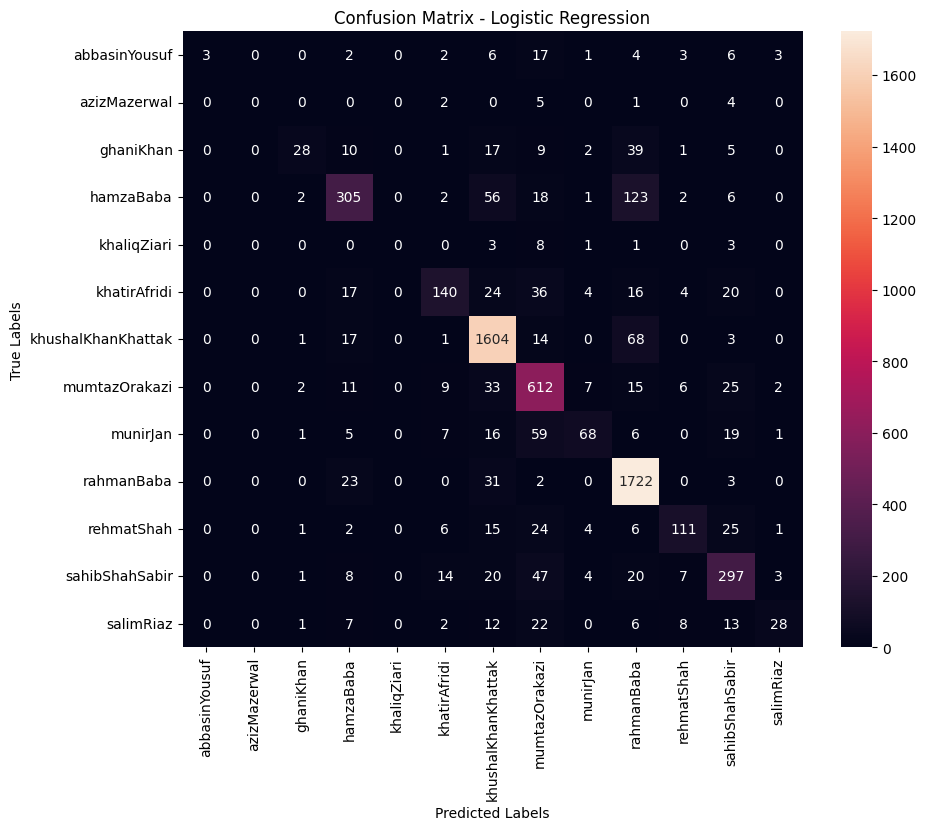

In [10]:
# Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"F1 Score (Weighted): {f1_log_reg:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_log_reg, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Logistic Regression Model with TF-IDF Vectorization, Hyperparameter Tuning

In [11]:
log_reg_tuned = LogisticRegression()
log_reg_param_grid = {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'liblinear']}
# log_reg_param_grid = {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

print(f"Training the Logistic Regression model...")
grid_search = GridSearchCV(log_reg_tuned, log_reg_param_grid, cv=5, scoring='f1_weighted', verbose=1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_log_reg_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred_log_reg_tuned = best_log_reg_model.predict(X_test)
print(f"Training and Predicting Done!")

Training the Logistic Regression model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 10, 'solver': 'newton-cg'}
Training and Predicting Done!



Model Performance and Evaluation
Accuracy: 0.8378
F1 Score (Weighted): 0.8317
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.21      0.31        47
           1       0.44      0.33      0.38        12
           2       0.69      0.45      0.54       112
           3       0.75      0.71      0.73       515
           4       0.00      0.00      0.00        16
           5       0.75      0.63      0.68       261
           6       0.92      0.93      0.92      1708
           7       0.79      0.84      0.81       722
           8       0.62      0.52      0.57       182
           9       0.90      0.97      0.93      1781
          10       0.73      0.64      0.68       195
          11       0.69      0.73      0.71       421
          12       0.64      0.53      0.58        99

    accuracy                           0.84      6071
   macro avg       0.65      0.58      0.60      6071
weighted avg       0.83      0.8

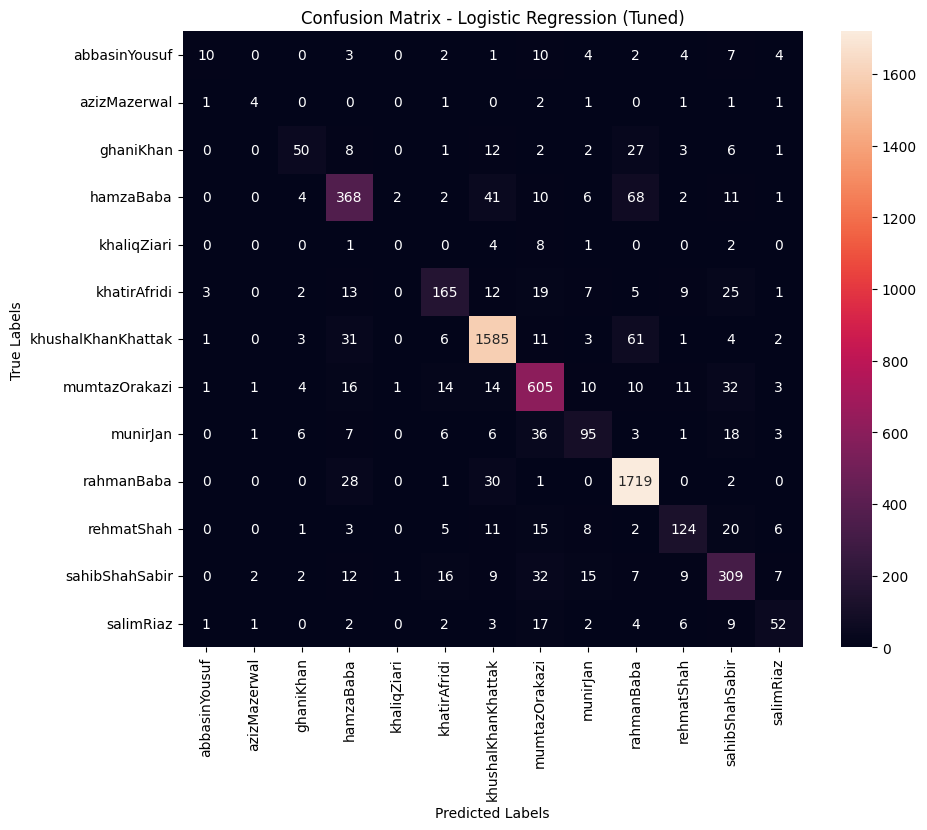

In [12]:
# Evaluation
accuracy_log_reg_tuned = accuracy_score(y_test, y_pred_log_reg_tuned)
f1_log_reg_tuned = f1_score(y_test, y_pred_log_reg_tuned, average='weighted')
conf_mat_log_reg_tuned = confusion_matrix(y_test, y_pred_log_reg_tuned)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_log_reg_tuned:.4f}")
print(f"F1 Score (Weighted): {f1_log_reg_tuned:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log_reg_tuned)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_log_reg_tuned, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.show()

### Random Forest Model with TF-IDF Vectorization, Unbalanced Data

In [10]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# rf = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=42)

print(f"Training the Random Forest model...")
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f"Training and Predicting Done!")

Training the Random Forest model...
Training and Predicting Done!



Model Performance and Evaluation
Accuracy: 0.5995
F1 Score (Weighted): 0.5848
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46       750
           1       0.46      0.57      0.51       471
           2       0.43      0.35      0.39       391
           3       0.52      0.46      0.49       575
           4       0.74      0.91      0.82      1703
           5       0.50      0.15      0.23       243
           6       0.57      0.67      0.62       658
           7       0.61      0.56      0.58       468
           8       0.50      0.39      0.43       342
           9       0.45      0.15      0.23       229
          10       0.76      0.70      0.73       881
          11       0.81      0.26      0.40       194
          12       0.62      0.47      0.53       421

    accuracy                           0.60      7326
   macro avg       0.57      0.48      0.49      7326
weighted avg       0.60      0.6

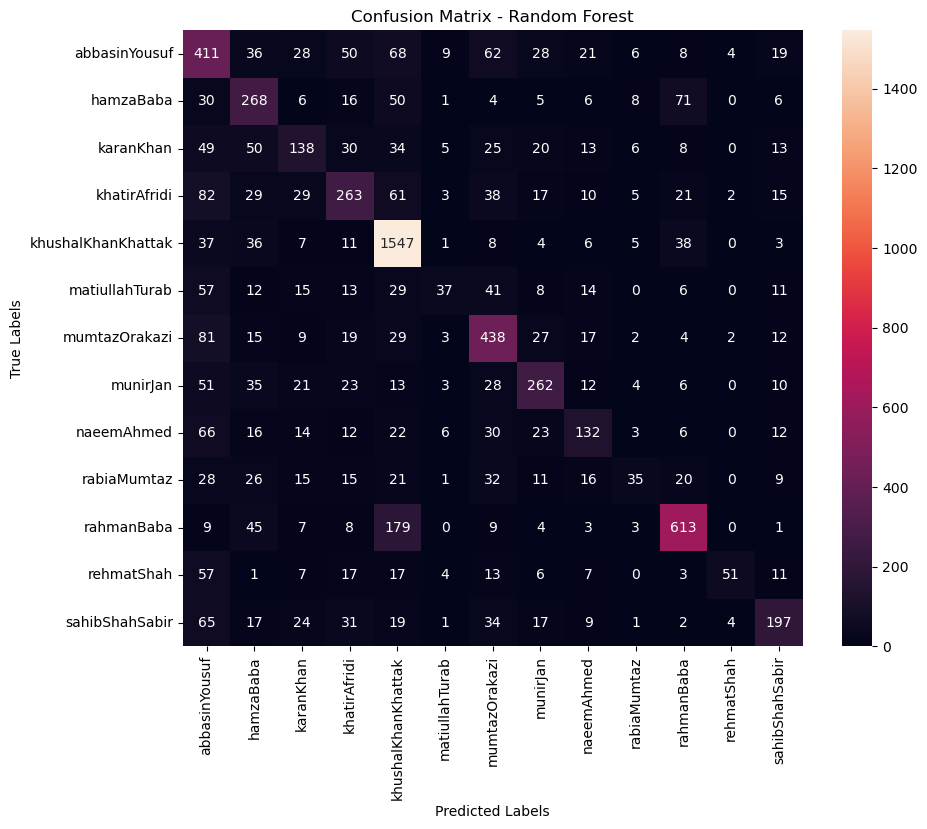

: 

In [ ]:
# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score (Weighted): {f1_rf:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Random Forest Model with TF-IDF Vectorization, Hyperparameter Tuning

In [31]:
rf_tuned = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False],
}

print(f"Training the Random Forest model...")
grid_search = RandomizedSearchCV(rf_tuned, param_grid, cv=5, scoring='f1_weighted', verbose=1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred_rf_tuned = best_rf_model.predict(X_test)
print(f"Training and Predicting Done!")

Training the Random Forest model...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 200, 'max_depth': None}
Training and Predicting Done!



Model Performance and Evaluation
Accuracy: 0.5908
F1 Score (Weighted): 0.5675
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.02      0.04        47
           1       0.67      0.17      0.27        12
           2       0.72      0.16      0.26       111
           3       0.47      0.57      0.52       471
           4       0.40      0.38      0.39       391
           5       0.00      0.00      0.00        16
           6       0.50      0.46      0.48       575
           7       0.70      0.92      0.80      1703
           8       0.43      0.15      0.22       243
           9       0.50      0.68      0.57       658
          10       0.51      0.51      0.51       468
          11       0.45      0.44      0.44       342
          12       0.43      0.14      0.22       229
          13       0.77      0.67      0.71       881
          14       0.76      0.32      0.45       194
          15       0.56      0.48

/home/alimuhammad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alimuhammad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alimuhammad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


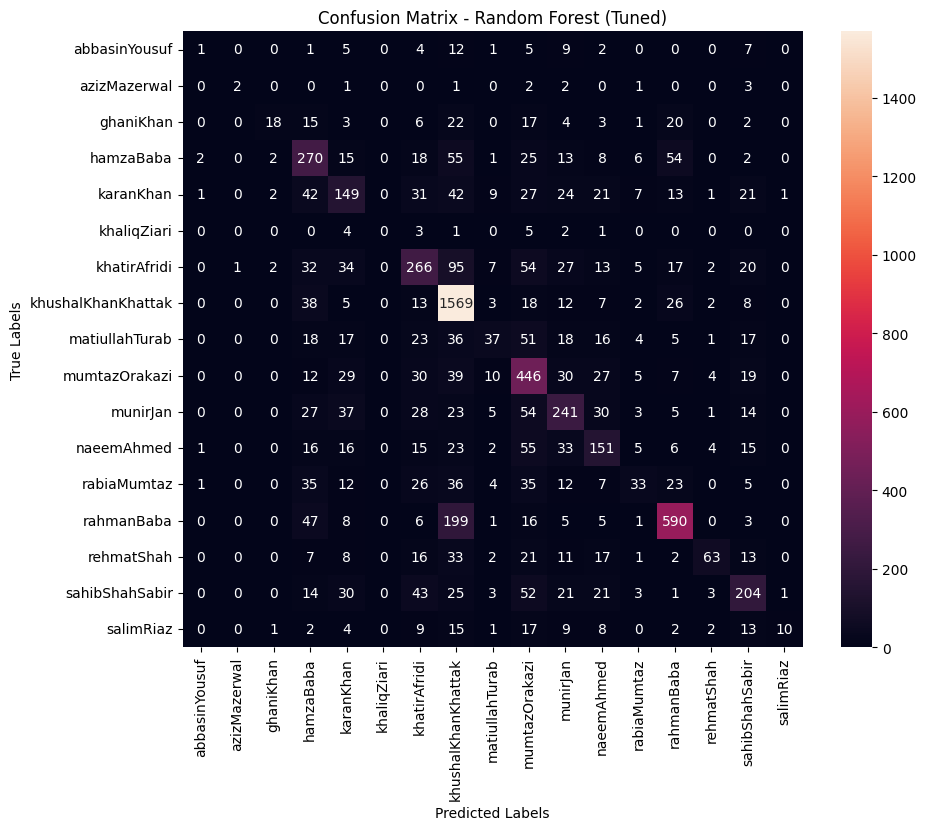

In [32]:
# Evaluation
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')
conf_mat_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"F1 Score (Weighted): {f1_rf_tuned:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf_tuned)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_rf_tuned, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.show()

### Gradient Boosting Model with TF-IDF Vectorization, Unbalanced Data

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1 max_depth=3, random_state=42)

print(f"Training the Gradient Boosting model...")
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print(f"Training and Predicting Done!")

In [ ]:
# Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_mat_gb = confusion_matrix(y_test, y_pred_gb)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"F1 Score (Weighted): {f1_gb:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_gb)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_gb, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

### Gradient Boosting Model with TF-IDF Vectorization, Hyperparameter Tuning

In [ ]:
gb_tuned = GradientBoostingClassifier()
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1],
#     'max_depth': [3, 5, 7],
# }
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

print(f"Training the Gradient Boosting model...")
grid_search = GridSearchCV(gb_tuned, param_grid, cv=5, scoring='f1_weighted', verbose=1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_gb_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred_gb_tuned = best_gb_model.predict(X_test)
print(f"Training and Predicting Done!")

In [ ]:
# Evaluation
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
f1_gb_tuned = f1_score(y_test, y_pred_gb_tuned, average='weighted')
conf_mat_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_gb_tuned:.4f}")
print(f"F1 Score (Weighted): {f1_gb_tuned:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_gb_tuned)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_gb_tuned, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting (Tuned)')
plt.show()

### XGBoost Model with TF-IDF Vectorization, Unbalanced Data

In [ ]:
# xgboost = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
xgboost = xgb.XGBClassifier(scale_pos_weight=1, n_estimators=100, learning_rate=0.1, max_depth=3, gamma=0.1, eval_metric='logloss', random_state=200)

print(f"Training the XGBoost model...")
xgboost.fit(X_train, y_train)

y_pred_xgboost = xgboost.predict(X_test)
print(f"Training and Predicting Done!")

In [ ]:
# Evaluation
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost, average='weighted')
conf_mat_xgboost = confusion_matrix(y_test, y_pred_xgboost)

# Print Metrics
print("\nModel Performance and Evaluation")
print(f"Accuracy: {accuracy_xgboost:.4f}")
print(f"F1 Score (Weighted): {f1_xgboost:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgboost)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_xgboost, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

### XGBoost Model with TF-IDF Vectorization, Hyperparameter Tuning

In [ ]:
xgboost_tuned = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'max_depth': [3, 5, 7],
#     'gamma': [0.1, 0.2, 0.3],
# }
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

print(f"Training the XGBoost model...")
grid_search = GridSearchCV(xgboost_tuned, param_grid, cv=5, scoring='f1_weighted', verbose=1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_xgboost_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred_xgboost_tuned = best_xgboost_model.predict(X_test)
print(f"Training and Predicting Done!")

In [ ]:
# Evaluation
accuracy_xgboost_tuned = accuracy_score(y_test, y_pred_xgboost_tuned)
f1_xgboost_tuned = f1_score(y_test, y_pred_xgboost_tuned, average='weighted')
conf_mat_xgboost_tuned = confusion_matrix(y_test, y_pred_xgboost_tuned)

# Print Metrics
print("\nModel Performance and Evaluation") 
print(f"Accuracy: {accuracy_xgboost_tuned:.4f}")
print(f"F1 Score (Weighted): {f1_xgboost_tuned:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgboost_tuned)}")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_xgboost_tuned, annot=True, fmt='d', xticklabels=poets, yticklabels=poets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.show()